In [13]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy

In [14]:
x = loadmat('C:/Users/rajra/OneDrive/Desktop/books/analysis of neural data/Ch3-EEG-2')

In [17]:
time = x['t']
t = time[0,:]
ecog = x['EEG']
ecog = ecog[:,0]


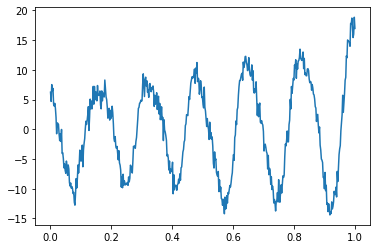

In [4]:
#plt.xlim(0, 1)
#plt.ylim(-1.5, 1.5)
plt.plot(t,ecog)

In [20]:
def compute_spectra(ecog,t):
    del_t = t[1] - t[0]
    T = len(ecog)*del_t

    xf = np.fft.fft(ecog-np.mean(ecog))
    Sxx = (2*del_t*del_t*xf*np.conj(xf))/T
    N = len(ecog)/2
    Sxx = Sxx[0:int(N)]

    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    plt.plot(faxis,10*np.log10(Sxx/max(Sxx)))
    
    #plt.xlim(0, 20)
    #plt.ylim(-80, 5)

In [6]:
plt.plot(faxis,10*np.log10(Sxx/max(Sxx)))
plt.xlim(0, 20)
plt.ylim(-50, 2)

NameError: name 'faxis' is not defined

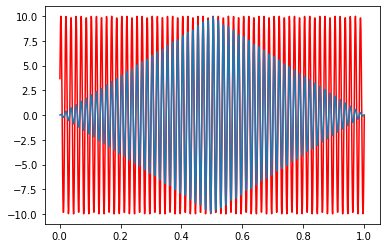

In [25]:
plt.plot(t,ecog,"r")
N=len(ecog) 

ecog_han = np.multiply(np.hanning(N),ecog)
#plt.plot(t,ecog_han)

ecog_kai = np.multiply(np.kaiser(N,14),ecog)
#plt.plot(t,ecog_kai)

ecog_bart = np.multiply(np.bartlett(N),ecog)
plt.plot(t,ecog_bart)



C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


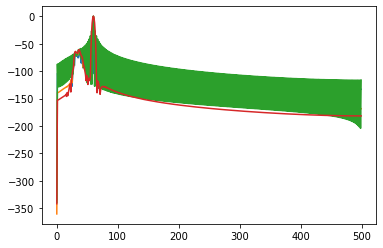

In [21]:
compute_spectra(ecog,t)
compute_spectra(ecog_han,t)
compute_spectra(ecog_bart,t)
compute_spectra(ecog_kai,t)